In [1]:
import sys
sys.path.insert(0, '../') 
import sphereGIS 
import numpy
import math
import shapely
import matplotlib.pyplot as plt
import geopandas

19255

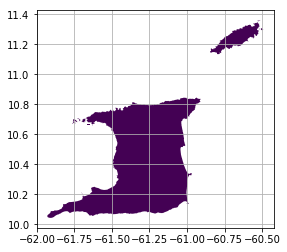

In [2]:
# Loading the geometries
fig, ax = plt.subplots()
ax.grid(True)

# 3:4 is canada 29:30 Brazil
#polygons = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))[3:4]

# 3:4 is trinidad
polygons = geopandas.read_file('../data/caribbean.gpkg')[3:4]

#polygons = geopandas.read_file('../data/santa_barbara.gpkg')[2:3]

polygons['row'] = polygons.index
#polygons = polygons[0:1] # 3:4 is canada 29:30 Brazil
polygons.plot(ax=ax, column='row')

geom_type = polygons.iloc[0].geometry.type
if  geom_type == 'Polygon':
    # We drop the last point because it is a repetition of the first point
    lon = polygons.iloc[0].geometry.exterior.xy[0][0:-1]
    lat = polygons.iloc[0].geometry.exterior.xy[1][0:-1]
elif geom_type == 'MultiPolygon':
    lon = []
    lat = []
    for p in list(polygons.iloc[0].geometry):
        lon += p.exterior.xy[0][0:-1]
        lat += p.exterior.xy[1][0:-1]

# Dirty trick to get rid of duplicate points
#lat, lon = zip(*(set(zip(lat, lon))))
len(lat)

In [3]:
lon = numpy.array(lon)
lat = numpy.array(lat)

# We convert to ECEF vectors
x = numpy.cos(lon/360*math.pi*2) * numpy.cos(lat/360*math.pi*2)
y = numpy.sin(lon/360*math.pi*2) * numpy.cos(lat/360*math.pi*2)
z = numpy.sin(lat/360*math.pi*2)

In [4]:
convex_node_indices = sphereGIS.xyz2convex(x,y,z)
convex_node_indices

array([   82,   270,   268,   379,   336,  2485,  2089, 18486, 18471,
       18468, 13729, 13727, 13725, 13724, 13722, 13716, 13714, 13695,
       13687, 13674, 13667, 13657, 13649, 13648, 11093, 10899,  9953,
        9936,    83], dtype=int32)

In [5]:
convex_nodes = []
for i in convex_node_indices:
    convex_nodes.append(shapely.geometry.Point(lon[i], lat[i]))
convex_nodes = geopandas.GeoDataFrame({'geom': convex_nodes}).set_geometry('geom')

convex_edges = shapely.geometry.LineString(zip(lon[convex_node_indices], lat[convex_node_indices]))
convex_edges = geopandas.GeoDataFrame({'geom': [convex_edges]}).set_geometry('geom')

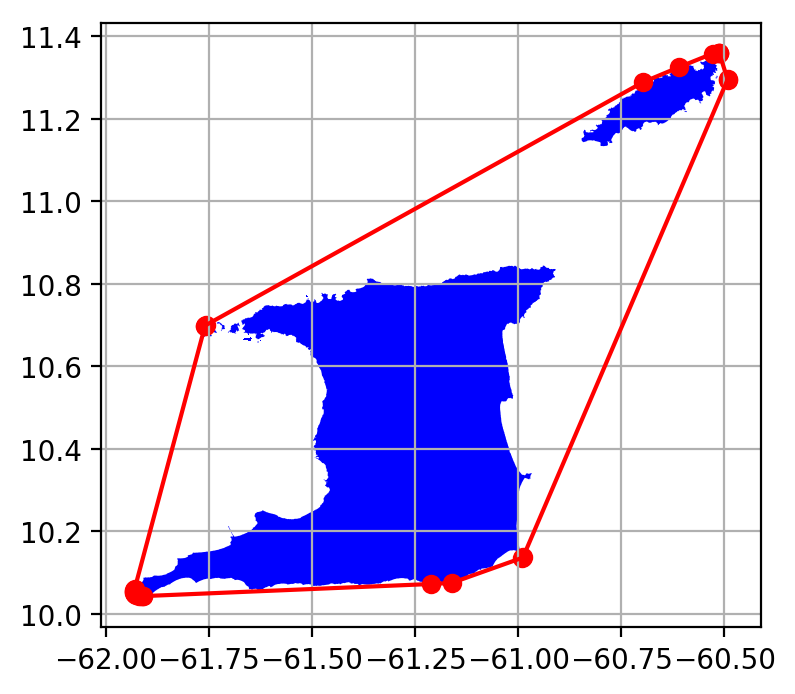

In [6]:
fig, ax = plt.subplots(dpi=200)
ax.grid(True)

polygons.plot(ax=ax, color='b')
convex_nodes.plot(ax=ax, color='r')
convex_edges.plot(ax=ax, color='r')